# Banknote Authentication Analysis

The objective of this project is to determine if machine learning can detect fake bank notes. Since data science is fueled by data, it was essential to collect and digitize hundreds of notes of images of genuine and forged banknotes. Wavelets, a mathematical tool were used to extract information from many different kinds of data, including images. Wavelets were used to extract features from our images. Using K¬means clustering, we can organize the data into two clusters; one which contains the wavelets of the real bank notes and one that contains wavelets of fake bank notes, using this analysis we could determine an algorithm to detect fake notes based on wavelet data.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

This example aims to detect fraudulent notes accurately. For that, a set of images taken from genuine and forged banknote-like specimens is created. Features such as wavelet variance, wavelet skewness, wavelet kurtosis, and image entropy are extracted from the images. The data file banknote_authentication.csv is the source of information for the classification problem. The number of instances (rows) in the data set is 1372, and the number of variables (columns) is 2.

In [2]:
df = pd.read_csv('Banknote_authentication_dataset.csv')
df.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


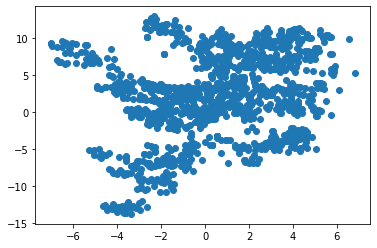

In [3]:
plt.scatter(df['V1'],df['V2'])

In [4]:
V1 = df['V1']
V2 = df['V2']
V1.mean()

0.43373525728862977

In [5]:
V1 = df['V1']
V2 = df['V2']
V2.mean()

1.9223531209912554

In [6]:
V1 = df['V1']
V2 = df['V2']
V1.std()

2.8427625862451675

In [7]:
V1 = df['V1']
V2 = df['V2']
V2.std()

5.8690467435803795

Visually, there are a few clusters that can be extracted from the graph. From -6 to 0, there are a few at a point that are distinctly different from the rest of the data. Therefore, this data would be suitable data clustering.

In [8]:
km = KMeans (n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df[['V1','V2']])
y_predicted

array([0, 0, 2, ..., 1, 1, 2])

In [10]:
df['cluster']= y_predicted
df.head()

,V1,V2,cluster
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,2
3,3.45660,9.5228,0
4,0.32924,-4.4552,1


In [11]:
km.cluster_centers_

array([[ 1.23085963,  8.35227115],
       [-0.95032489, -6.95550399],
       [ 0.46505323,  1.19198829]])

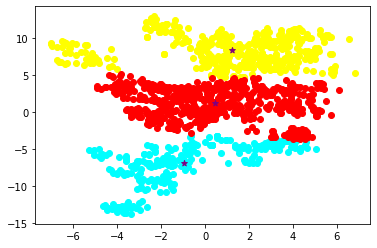

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.V1,df1['V2'], color ='yellow')
plt.scatter(df2.V1,df2['V2'], color ='cyan')
plt.scatter(df3.V1,df3['V2'], color ='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.show()

# Fake or Genuine
Hence we can have 2 groups.

In [13]:
km = KMeans (n_clusters=2)

In [14]:
y_predicted = km.fit_predict(df[['V1','V2']])
y_predicted

array([1, 1, 0, ..., 0, 0, 0])

In [15]:
df['cluster']= y_predicted
df.head

<bound method NDFrame.head of            V1        V2  cluster
0     3.62160   8.66610        1
1     4.54590   8.16740        1
2     3.86600  -2.63830        0
3     3.45660   9.52280        1
4     0.32924  -4.45520        0
...       ...       ...      ...
1367  0.40614   1.34920        1
1368 -1.38870  -4.87730        0
1369 -3.75030 -13.45860        0
1370 -3.56370  -8.38270        0
1371 -2.54190  -0.65804        0

[1372 rows x 3 columns]>

In [16]:
km.cluster_centers_

array([[-0.1109624 , -3.5223832 ],
       [ 0.84960982,  6.0793883 ]])

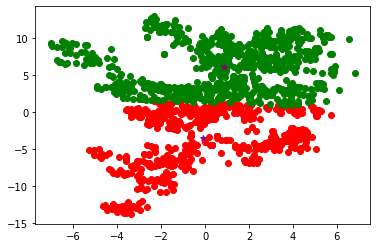

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.V1,df1['V2'], color ='red')
plt.scatter(df2.V1,df2['V2'], color ='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.show()

The red one belongs to the Fake Notes while the green belongs to Genuine notes. The purple dots are the cluster centers.

# References
Foundations of Data Science : KMeans Clustering www.coursera.org